In [11]:
# read C-VFL data

import os
import sys

sizes = {
    "C-VFL" : {
        "covtype": (907.18823242,85.47625732,821.7119751),
        "msd": (815.41220093,68.29418945,747.11801147),
        "gisette": (10.82678223,1.24609375,9.58068848),
        "realsim": (113.33105469,10.95928955,102.37176514),
        "epsilon": (620.21264648,58.9609375,561.25170898),
        "letter": (25.57067871,2.56445312,23.00622559),
        "radar": (509.42492676,48.09674072,461.32818604)
    },
    "GAL": {
        "covtype": (3723.529815673828, 1861.764907836914, 1861.764907836914),
        "msd": (424.54376220703125, 212.27188110351562, 212.27188110351562),
        "gisette": (5.4931640625, 2.74658203125, 2.74658203125),
        "realsim": (66.20063781738281, 33.100318908691406, 33.100318908691406),
        "epsilon": (366.2109375, 183.10546875, 183.10546875),
        "letter": (357.0556640625, 178.52783203125, 178.52783203125),
        "radar": (2088.167953491211, 1044.0839767456055, 1044.0839767456055)
    },
    "FedTree": {
        "covtype": (7448.768615722656, 1.708984375, 7447.059631347656),
        "msd": (849.5025634765625, 0.4150390625, 849.0875244140625),
        "gisette": (33.87451171875, 22.88818359375, 10.986328125),
        "realsim": (228.33633422851562, 95.93505859375, 132.40127563476562),
        "epsilon": (741.5771484375, 9.1552734375, 732.421875),
        "letter": (717.28515625, 3.173828125, 714.111328125),
        "radar": (4181.890106201172, 5.55419921875, 4176.335906982422)
    },
    "SplitNN": {
        "covtype": (66225.57907104492, 33112.78953552246, 33112.78953552246),
        "msd": (52855.69839477539, 26427.849197387695, 26427.849197387695),
        "gisette": (683.89892578125, 341.949462890625, 341.949462890625),
        "realsim": (8242.007446289062, 4121.003723144531, 4121.003723144531),
        "epsilon": (45593.26171875, 22796.630859375, 22796.630859375),
        "letter": (1709.747314453125, 854.8736572265625, 854.8736572265625),
        "radar": (37139.5866394043, 18569.79331970215, 18569.79331970215)
    }
}

def read_dataset(name):
    result = [    ]
    
    for d in ['C-VFL', 'FedTree', 'GAL', 'SplitNN']:
        fname = os.path.join(d, name+".csv")
        # print(fname)
        f = open(fname, "r")
        lines = f.readlines()
        f.close()

        epochs = []
        accs = []
        for line in lines:
            epochs.append(int(line.split(",")[0].strip())+ 1) # epoch 从1开始
            acc = float(line.split(",")[1].strip())
            if d in ["SplitNN", 'FedTree']:
                if name != "msd":
                    acc = acc * 100
            accs.append(acc)
        
        result.append((d, name, epochs[:199], accs[:199]))
    return result

def epoch_to_MB(epochs, dataset, algo):
    # map epochs to MB
    result = []
    for e in epochs:
        if algo == "C-VFL":
            result.append(e * sizes[algo][dataset][0]) # 1 epoch data
        elif algo in ["FedTree", "GAL", "SplitNN"]:
            result.append(e * sizes[algo][dataset][0] / 50) # 50 epochs data
    return result


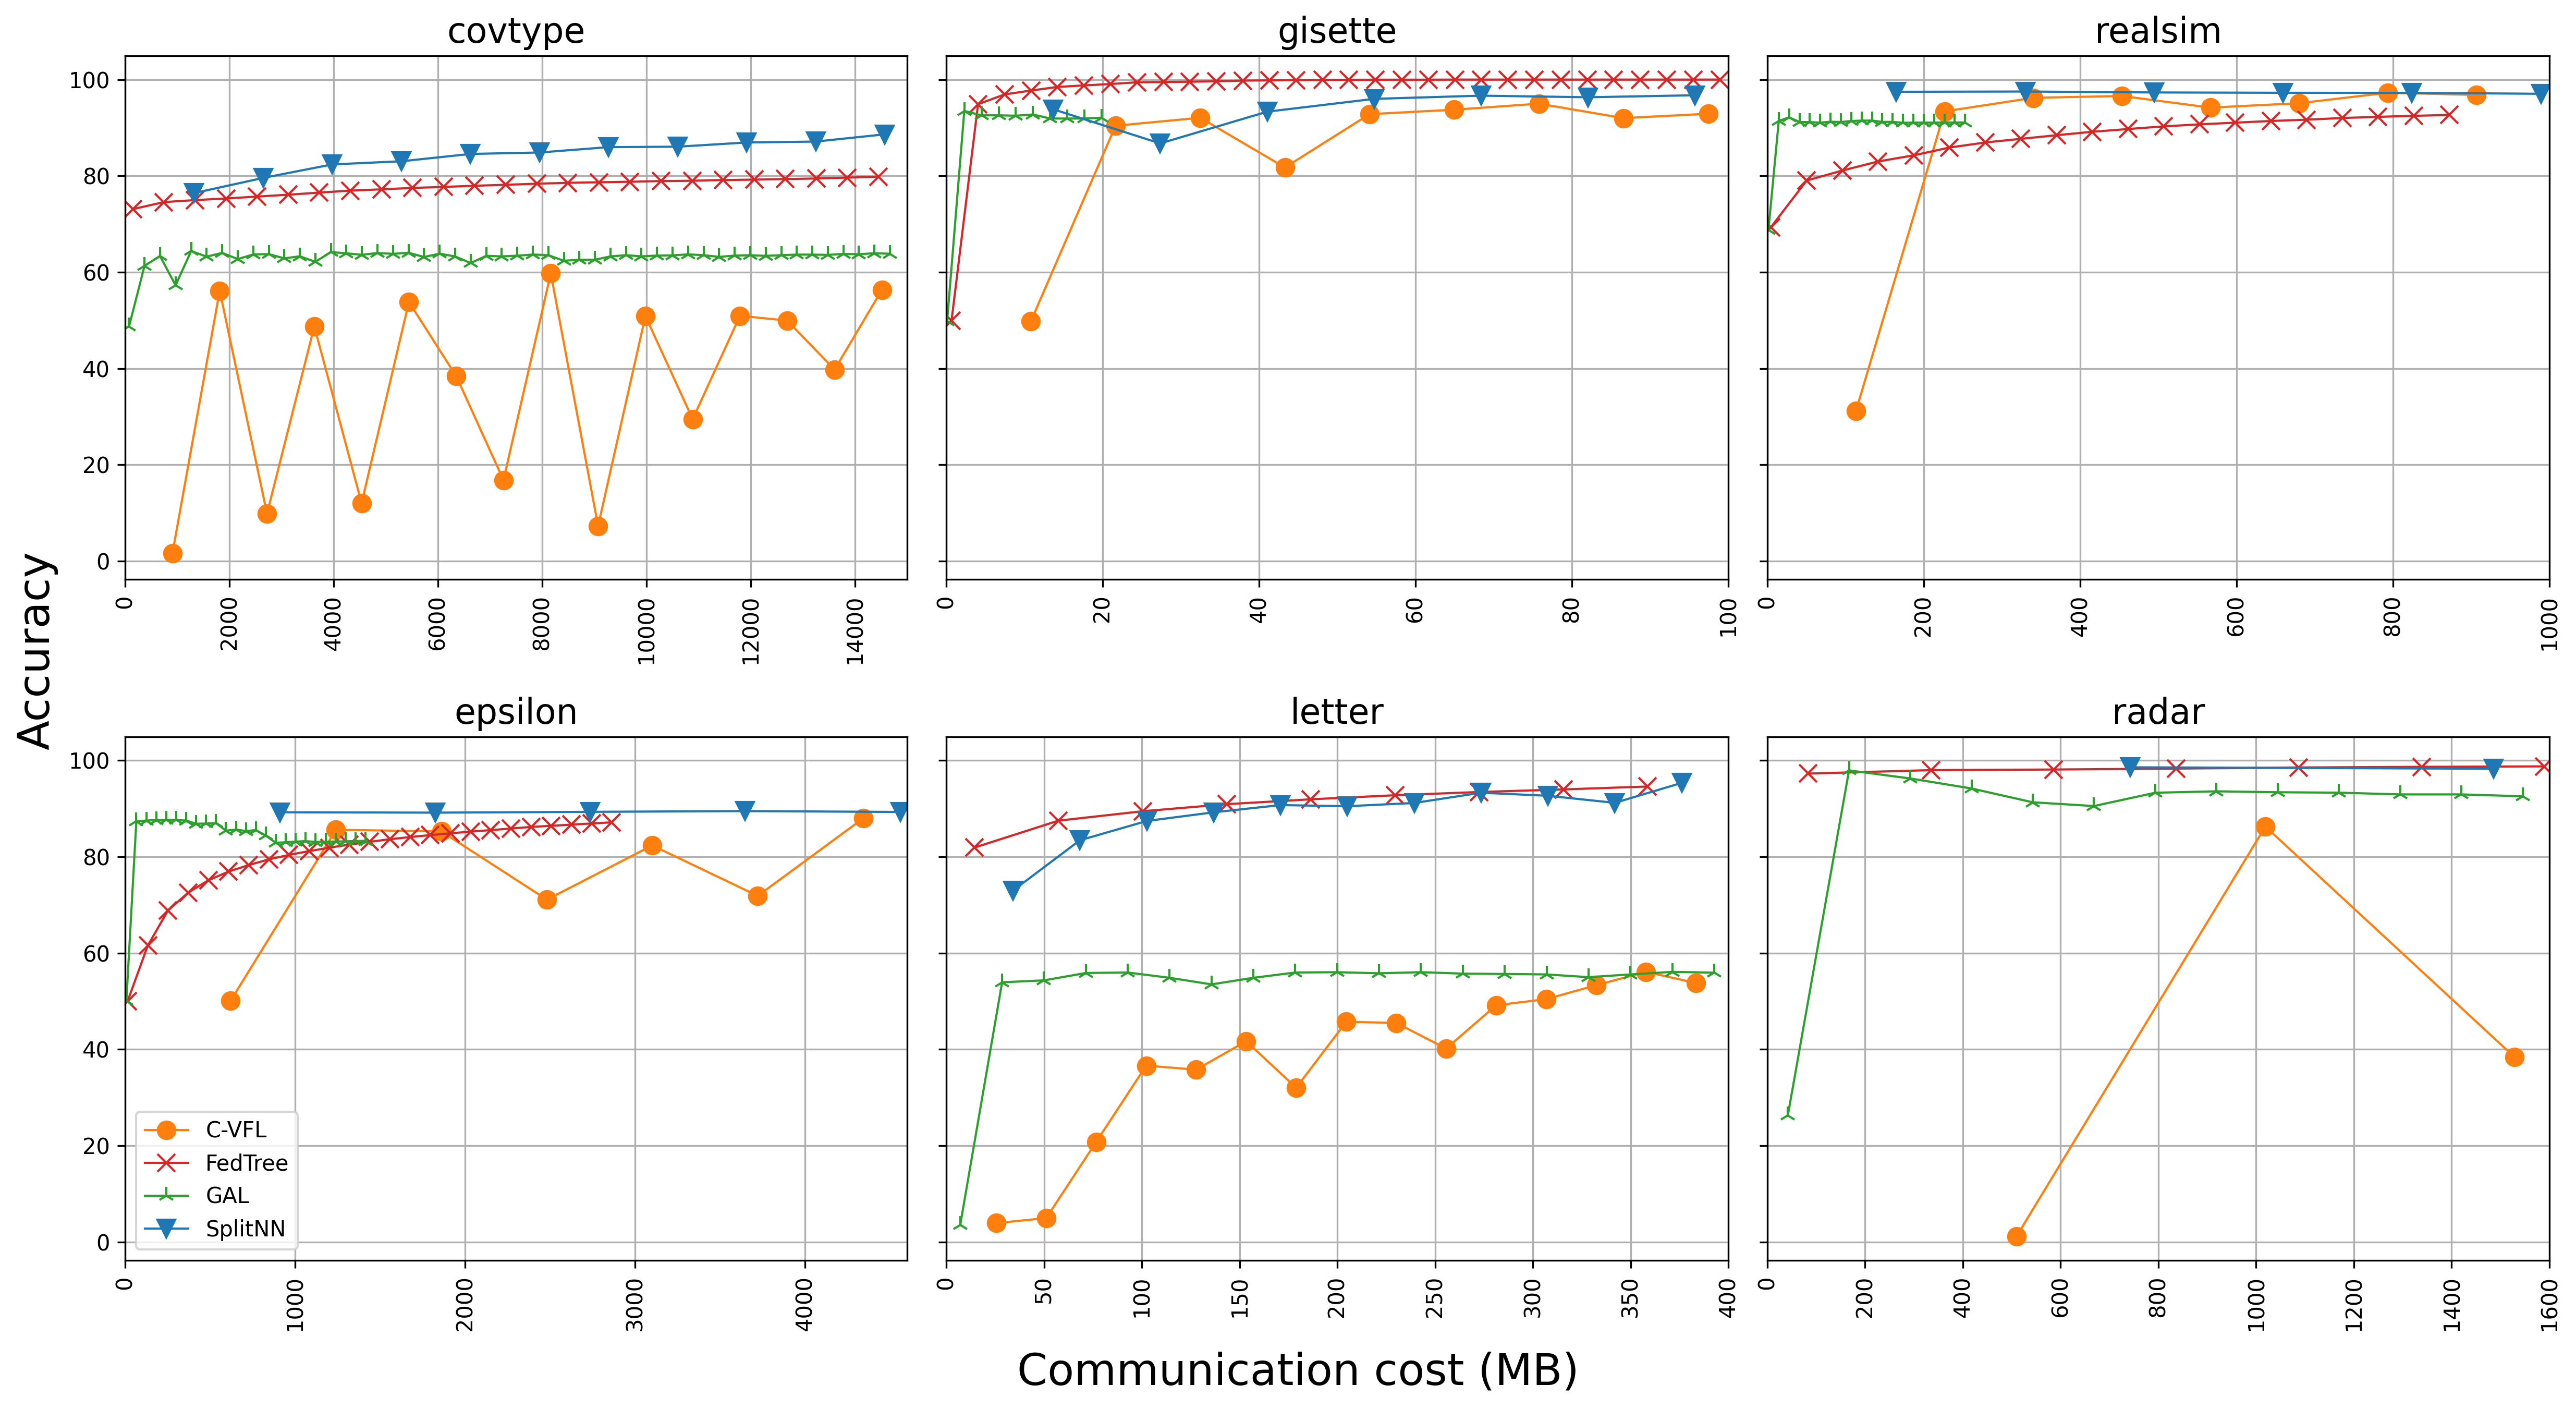

In [29]:
import matplotlib.pyplot as plt

markers = {
    "FedTree": "x",
    "C-VFL": "o",
    "GAL": "2",
    "SplitNN": "v"
}

colors = {
    "FedTree": "#d62728",
    "C-VFL": "#ff7f0e",
    "GAL": "#2ca02c",
    "SplitNN": "#1f77b4"
}

def draw(dataset, ax):
    epochs = []
    accs = []

    for file in read_dataset(dataset):
        algo = file[0]
        dataset = file[1]
        epochs = epoch_to_MB(file[2], dataset, algo)
        accs = file[3]
        
        if dataset == "letter":
            epochs = [x for x in epochs if x <= 400]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 400)
            ax.axis(xmin=0, xmax=400)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::3]
                accs = accs[::3]

        if dataset == "gisette":
            epochs = [x for x in epochs if x <= 100]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 100)
            ax.axis(xmin=0, xmax=100)
            # sparse the points
            if algo in ["FedTree"]:
                epochs = epochs[::5]
                accs = accs[::5]
            if algo in ['GAL']:
                epochs = epochs[::20]
                accs = accs[::20]

        if dataset == "radar":
            epochs = [x for x in epochs if x <= 1600]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 1600)
            ax.axis(xmin=0, xmax=1600)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::3]
                accs = accs[::3]
                
        if dataset == "realsim":
            epochs = [x for x in epochs if x <= 1000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 1000)
            ax.axis(xmin=0, xmax=1000)
            # sparse the points
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::10]
                accs = accs[::10]
        
        if dataset == "covtype":
            epochs = [x for x in epochs if x <= 15000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 15000)
            ax.axis(xmin=0, xmax=15000)
            if algo in ["FedTree", 'GAL']:
                epochs = epochs[::4]
                accs = accs[::4]
                
        if dataset == "epsilon":
            epochs = [x for x in epochs if x <= 4600]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 4600)
            ax.axis(xmin=0, xmax=4600)
            if algo in ["FedTree"]:
                epochs = epochs[::8]
                accs = accs[::8]
            if algo in ['GAL']:
                epochs = epochs[::8]
                accs = accs[::8]
        
        if dataset == "msd":
            epochs = [x for x in epochs if x <= 6000]
            accs = file[3][:len(epochs)]
            # ax.xlim(0, 6000)
            ax.axis(xmin=0, xmax=6000)
            if algo in ["FedTree"]:
                epochs = epochs[::6]
                accs = accs[::6]
            if algo in ['GAL']:
                epochs = epochs[:30:6]
                accs = accs[:30:6]
        
        ax.tick_params(axis='x', rotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.plot(epochs, accs, label=algo, marker=markers[algo], markersize=8, linewidth=1, color=colors[algo])

    
    ax.set_title(dataset, fontsize=16)
    ax.grid(True)

datasets = ["covtype", "gisette", "realsim", "epsilon", "letter", "radar"]
fig, axs = plt.subplots(2, 3,figsize=(20, 10), sharey=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.3}, dpi=300)

# 在每个子图中绘制数据集
for i, dataset in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    draw(dataset, ax)
    if dataset == "msd":
        ax.set_ylabel("RMSE", fontsize=16)

axs[1, 0].legend()
# fig.suptitle("Accuracy and communication cost of different algorithms on different datasets", y=1.03)
fig.supxlabel('Communication cost (MB)', x=0.5, y=0.025, fontsize=20)
fig.supylabel('Accuracy', x=0.09, y=0.5, fontsize=20)
fig.savefig(f"communication_accuracy.png", bbox_inches='tight', dpi=300)
plt.show()

/var/folders/qf/rk4syvbd6pj14d3_j_hdm8700000gn/T/ipykernel_48095/261290698.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


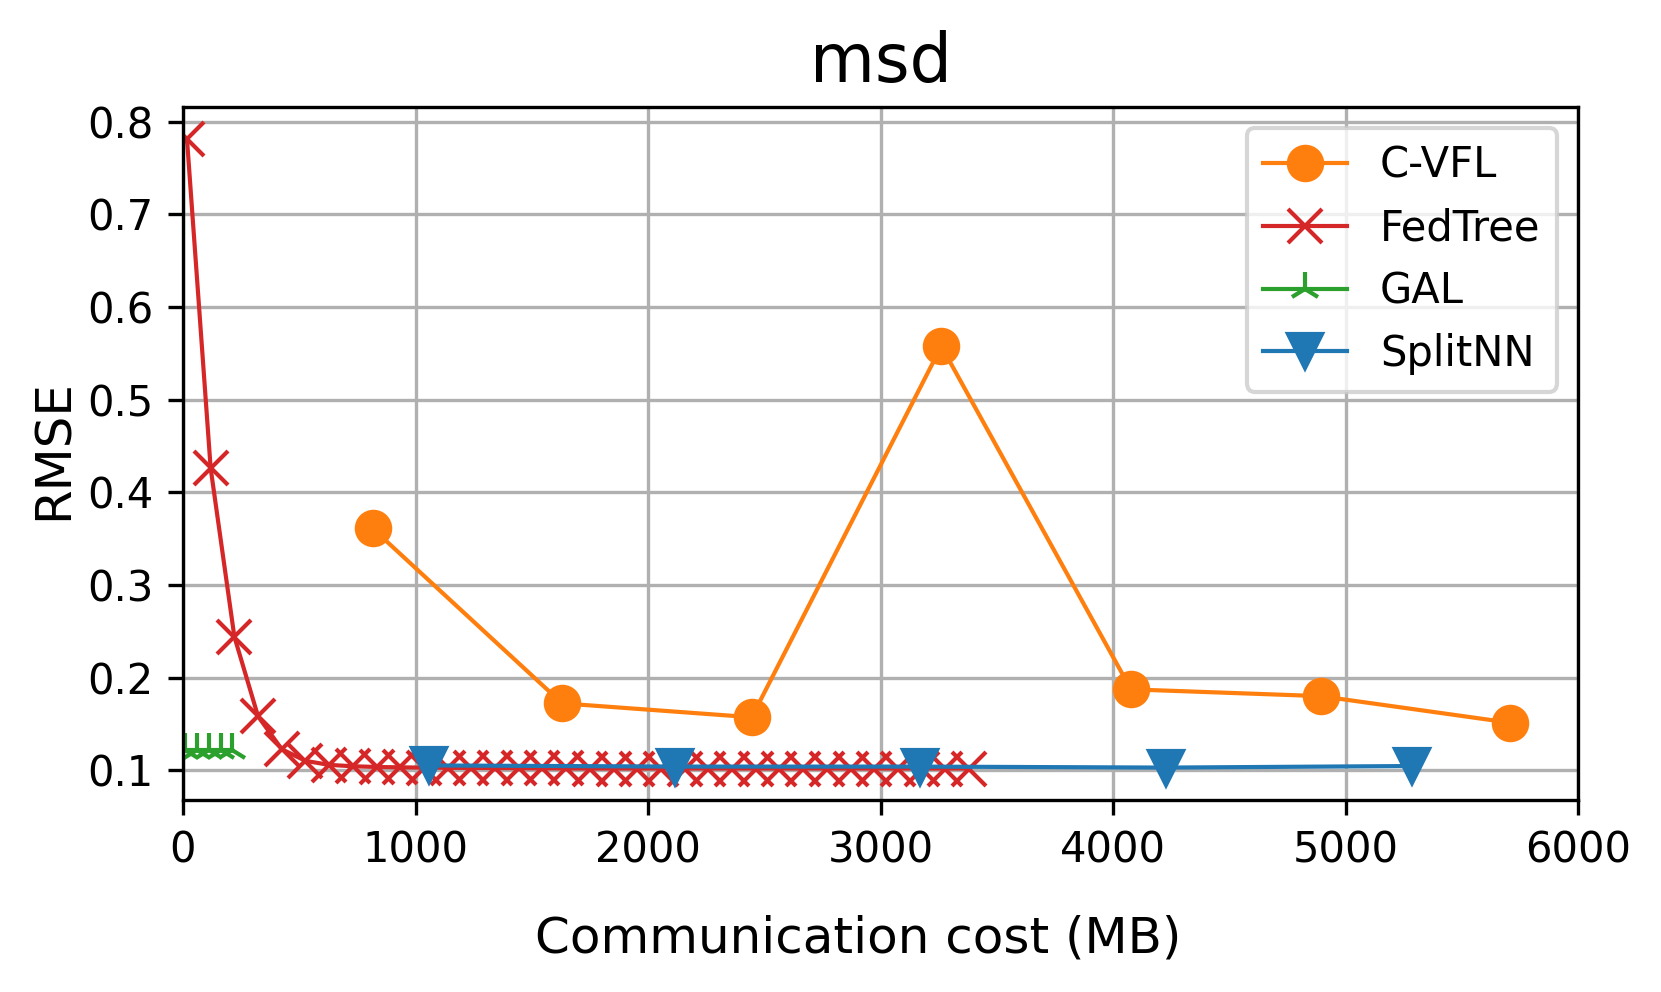

In [28]:
fig, axs = plt.subplots(1,1,figsize=(6, 3), sharey=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.3}, dpi=300)

draw("msd", axs)
axs.tick_params(axis='x', rotation=0, labelsize=10)
axs.legend()
fig.supylabel("RMSE", x=0.04)
fig.supxlabel("Communication cost (MB)", y=-0.07)
fig.savefig("communication_rmse.png", bbox_inches='tight', dpi=300)
fig.show()